In [1]:
# requires matplotlib (pip install matplotlib)
import numpy as np
import time
from annchor.datasets import load_digits
import matplotlib.pyplot as plt

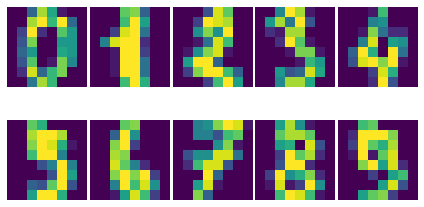

In [8]:
k=25

X = load_digits()['X']
y = load_digits()['y']
neighbor_graph = load_digits()['neighbor_graph']

nx = X.shape[0]

fig,axs = plt.subplots(2,5)
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.imshow(X[y==i][0].reshape(8,8))
    ax.axis('off')

plt.tight_layout(h_pad=0.1, w_pad=0.3)
plt.show()

In [9]:
from annchor.distances import wasserstein
from annchor import compare_neighbor_graphs



In [10]:
from annchor import BruteForce

start_time = time.time()

bruteforce = BruteForce(X,wasserstein)
bruteforce.fit()

print('Brute Force Time: %5.3f seconds' % (time.time()-start_time))

error = compare_neighbor_graphs(neighbor_graph,
                                bruteforce.neighbor_graph,
                                25)

print('Brute Force Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))

Brute Force Time: 76.201 seconds
Brute Force Accuracy: 0 incorrect NN pairs (0.000%)


In [11]:
from pynndescent import NNDescent

start_time = time.time()

# Call nearest neighbour descent
nndescent = NNDescent(X,n_neighbors=k,metric=wasserstein,random_state=1)
print('PyNND Time: %5.3f seconds' % (time.time()-start_time))

# Test accuracy
error = compare_neighbor_graphs(neighbor_graph,
                                nndescent.neighbor_graph,
                                25)
print('PyNND Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))

PyNND Time: 56.181 seconds
PyNND Accuracy: 29 incorrect NN pairs (0.065%)


In [12]:
from annchor import Annchor


start_time = time.time()

# Call ANNchor
ann = Annchor(X,
              wasserstein,
              n_anchors=25,
              n_neighbors=k,
              n_samples=5000,
              p_work=0.16)

ann.fit()
print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))


# Test accuracy
error = compare_neighbor_graphs(neighbor_graph,
                                ann.neighbor_graph,
                                25)
print('ANNchor Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))

ANNchor Time: 15.446 seconds
ANNchor Accuracy: 6 incorrect NN pairs (0.013%)


In [13]:
# Load the data
from annchor.datasets import load_digits_large

k=25

X = load_digits_large()['X']
y = load_digits_large()['y']
neighbor_graph = load_digits_large()['neighbor_graph']

nx = X.shape[0]


start_time = time.time()

## Call nearest neighbour descent
nndescent = NNDescent(X,n_neighbors=k,metric=wasserstein,random_state=1)
print('PyNND Time: %5.3f seconds' % (time.time()-start_time))

## Test accuracy
error = compare_neighbor_graphs(neighbor_graph,
                                nndescent.neighbor_graph,
                                k)
print('PyNND Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))


from annchor import Annchor

start_time = time.time()

# Call ANNchor
ann = Annchor(X,
              wasserstein,
              n_anchors=30,
              n_neighbors=k,
              n_samples=5000,
              p_work=0.1)

ann.fit()
print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))


# Test accuracy
error = compare_neighbor_graphs(neighbor_graph,
                                ann.neighbor_graph,
                                k)
print('ANNchor Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))

PyNND Time: 192.754 seconds
PyNND Accuracy: 86 incorrect NN pairs (0.061%)
ANNchor Time: 91.826 seconds
ANNchor Accuracy: 1 incorrect NN pairs (0.001%)
